In [1]:
import numpy as np
import copy
import random
import time
import pandas as pd
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.adam import Adam
from torch.optim.optimizer import Optimizer
from torch.optim.sgd import SGD
import warnings
from autorank import autorank, plot_stats, create_report, latex_table
warnings.filterwarnings("ignore")
import sys
import os
current = os.getcwd()
parent = os.path.dirname(current)
sys.path.append(parent)
from Arhitectures.utils import get_report,decompose_trial_into_relevant_columns_pandas
from Arhitectures.utils import get_classification_report,resettable
from Arhitectures.models.mlp import MLPNN
from Datasets.get_random_datasets import get_cifar10,get_binary_data
from Arhitectures.classifiers.general import Classifier



In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
#X_train, X_test, y_train, y_test=get_cifar10()
X,y, X_train, X_test, y_train, y_test=get_binary_data(name='make_circles')

In [4]:
model=MLPNN(input_dim=2,output_dim=1,hidden_layers=((64,34,64)))
optimiser= torch.optim.SGD( model.parameters(),lr=1e-4, momentum=0.9)
loss_function=nn.BCELoss()
classifier=Classifier(model,optimiser,loss_function=loss_function,batch_size=15)
classifier.fit(X_train.astype(np.float),y_train.astype(float) )
y_pred=classifier.predict(X_test)
y_pred_score=classifier.predict_proba(X_test)



In [6]:
y_pred_score

tensor([[0.4755],
        [0.4586],
        [0.4602],
        [0.4863],
        [0.4698],
        [0.4714],
        [0.4776],
        [0.4574],
        [0.4627],
        [0.4548],
        [0.4700],
        [0.4591],
        [0.4599],
        [0.4801],
        [0.4843],
        [0.4899],
        [0.4606],
        [0.4819],
        [0.4772],
        [0.4311],
        [0.4732],
        [0.4718],
        [0.4861],
        [0.4622],
        [0.4469],
        [0.4670],
        [0.5058],
        [0.4707],
        [0.4640],
        [0.4797],
        [0.4775],
        [0.4716],
        [0.4667],
        [0.4696],
        [0.4425],
        [0.4709],
        [0.4691],
        [0.4568],
        [0.4678],
        [0.4618]])

              precision    recall  f1-score   support

           0       0.47      1.00      0.64        19
           1       0.00      0.00      0.00        21

    accuracy                           0.48        40
   macro avg       0.24      0.50      0.32        40
weighted avg       0.23      0.47      0.31        40



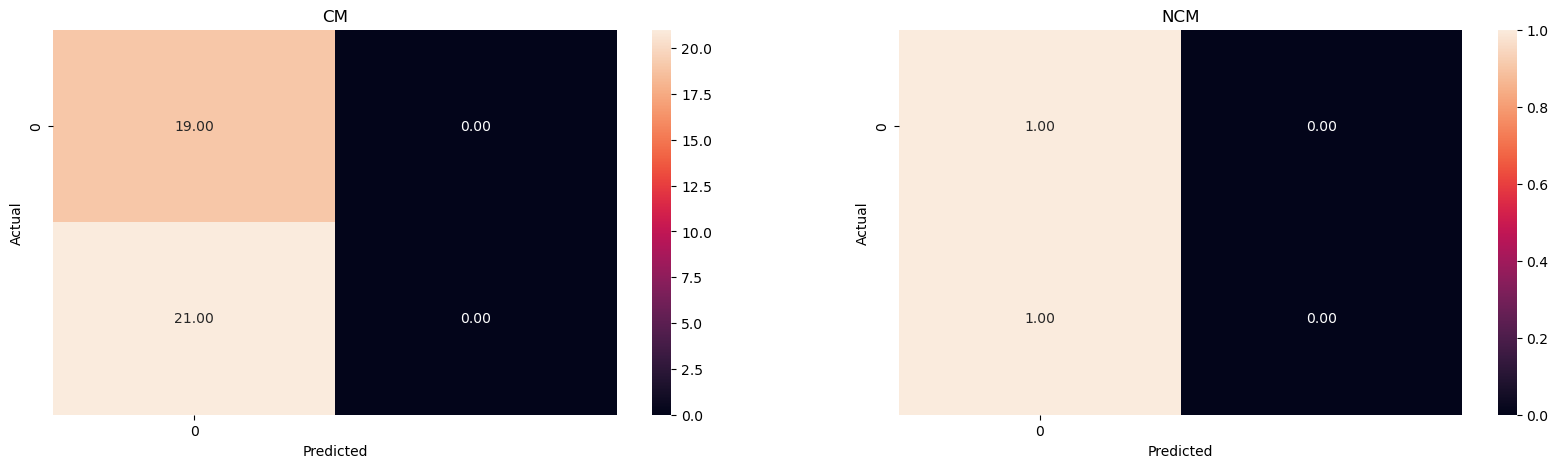

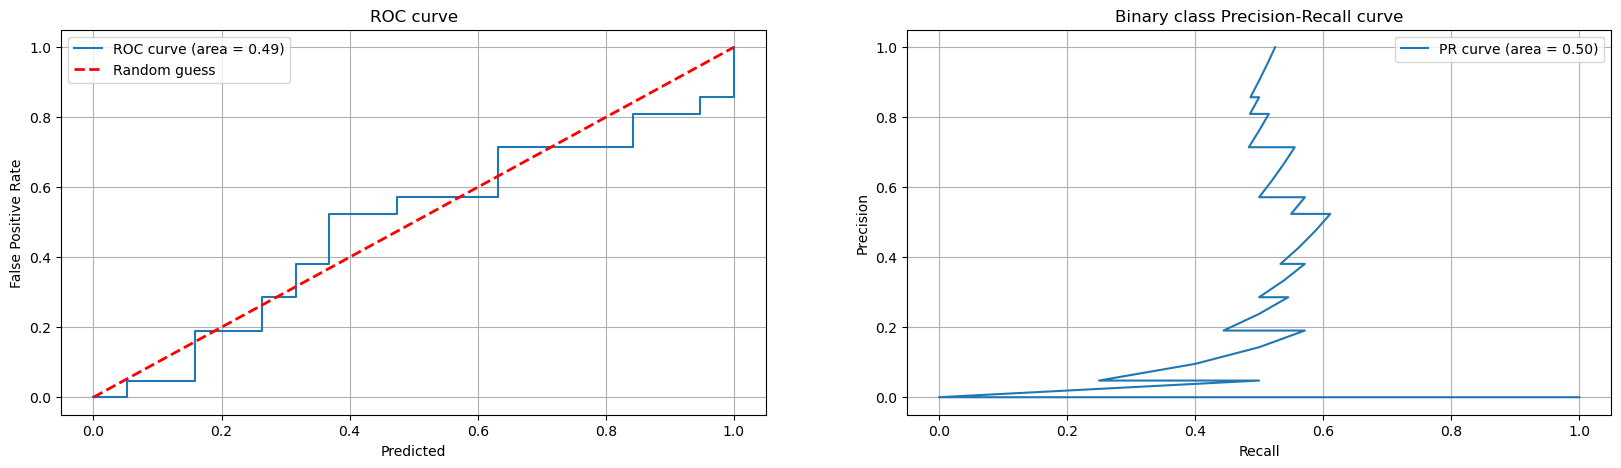

In [5]:
get_report(y_test, y_pred.detach().cpu().numpy(),y_pred_score.detach().cpu().numpy())


In [7]:
h,trials=Classifier(model,optimiser,loss_function=loss_function,batch_size=15).optimize_hyperparam(X=X,y=y, test_size=0.4, epochs=1,num_h_layers=(3,10))


In [15]:
decompose_trial_into_relevant_columns_pandas(trials)


,loss,num_h_layers
0,0.575,8
1,0.550,5
2,0.375,4
3,0.550,5
4,0.450,6
5,0.550,8
6,0.550,7
7,0.450,3
8,0.550,8
9,0.450,5


In [16]:
classifier.verbose=True
classifier.score_per_class(X_test, y_test)

Accuracy for class: 0 is 15.8 %
Accuracy for class: 1 is 81.0 %
